In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  scipy.fft import irfft

In [2]:
from common import*

def RebuildWave(c):
	t = c[1:]
	v = np.zeros(len(c)//2, dtype=complex)
	v.real = t[::2]
	v.imag = t[1::2]
	orgNumSamples = int(c[0])
	return GetInterpolatedWave(irfft(v), orgNumSamples)

def RebuildWaves(c):
	'''
	Reconstrói as ondas P, QRS, T, Completa
	dado o vetor c característico
	retorna uma lista com as 4 ondas
	'''
	ret = []
	s = 0
	def rebuild(i):
		nonlocal ret, s
		ret.append(RebuildWave(c[s:s+1+i]))
		s += 1+i
	for i in [tP, tQRS, tT, tAll]:
		rebuild(i)
	return ret

In [3]:
db = np.load("../preprocess/preprocessed0.npy")

In [4]:
dt = db[2]

In [5]:
p,qrs,t,beat = RebuildWaves(dt[8:])

In [6]:
a = (p[-1] - qrs[0])/np.log(len(p)/(len(p)+dt[276]))
b = np.exp((qrs[0]*np.log(len(p))-p[-1]*np.log(len(p)+dt[276]))/(p[-1] - qrs[0]))

In [7]:
pq = [a*np.log(b*x) for x in range(len(p),len(p)+int(dt[276]))]

In [8]:
a = (qrs[-1] - t[0])/np.log((len(p)+dt[276]+len(qrs))/(len(p)+dt[276]+len(qrs)+dt[277]))
b = np.exp((t[0]*np.log(len(p)+dt[276]+len(qrs))-qrs[-1]*np.log(len(p)+dt[276]+len(qrs)+dt[277]))/(qrs[-1] - t[0]))

In [9]:
st = [a*np.log(b*x) for x in range(len(p)+int(dt[276])+len(qrs),len(p)+int(dt[276])+len(qrs)+int(dt[277]))]

In [10]:
beat_rec = np.concatenate((p,pq,qrs,st,t))

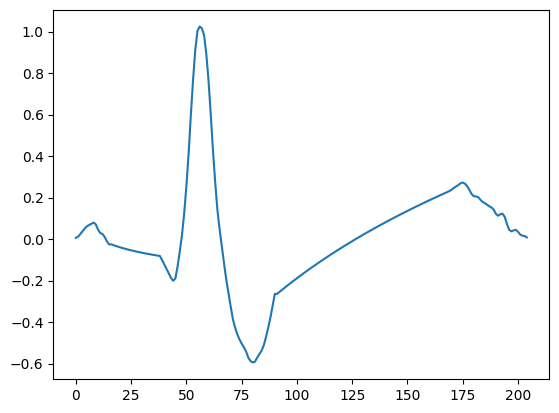

In [11]:
plt.plot([x for x in range(len(beat_rec))],beat_rec)

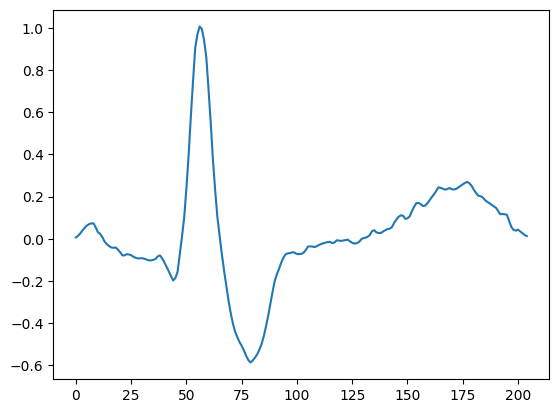

In [12]:
plt.plot([x for x in range(len(beat))],beat)